In [38]:
# fermi_modelのimportの前に置かないと、plt.rcParamsのfontSizeの設定が反映されない
%matplotlib inline 
from fermi_model import *

ne = 0.0001
Te = 0.5

# states3 = csv_to_states_from_filename()

e_num = 48
states48 = csv_to_states_from_filename(f'states{e_num}.csv')

# states3_30jump = csv_to_states_from_filename(filename="states3_30jump.csv")
# 下記のコードを実行すると、F
# fermiのクラス変数である電子数 n が改変されてしまい、populationやdistributionがエラーを起こしてしまうので注意
# states10 = csv_to_states(path='./output/states10.csv')
# states20 = csv_to_states(path='./output/states20.csv')


In [39]:
# states20 = csv_to_states_from_filename(filename='states20.csv')
# states10 = csv_to_states_from_filename(filename='states10.csv')

In [40]:
def calc_level_density(states: list[State]):
    """実際のエネルギー準位密度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    scores = np.fromiter(dct.keys(), dtype=int)
    scores = scores - scores[0]  # 基底状態のエネルギー準位を0[ε]にする
    level_density = np.fromiter(dct.values(), dtype=int) # ヒストグラムの幅は１として考えればよいので、密度ではあるが何も割る必要がない
    return scores, level_density

In [41]:
def calc_approx_level_density(states: list[State], rho_0: float, eps_0: float) -> NDArray[np.float64]:
    """近似したエネルギー準位密度を計算"""
    # 昇順にソート
    scores = np.sort(np.array(list({state.score for state in states})))
    scores = scores - scores[0]  # 基底状態のエネルギー準位を0[ε]にする
    return rho_0 * np.exp(scores/eps_0)

In [42]:
# 正規方程式を解く
def solve_normal_equation(xs: NDArray, ys: NDArray):
    """
    Args:
        xs (NDArray[float])
        ys (NDArray[float])
    
    Returns:
        intercept (float): 切片
        slope (float): 傾き
    """
    x_ave = xs.mean()
    y_ave = ys.mean()
    cov = np.sum((xs - x_ave) * (ys - y_ave))
    var = np.sum((xs - x_ave)**2)
    slope = cov / var
    intercept = y_ave - x_ave * slope
    return intercept, slope

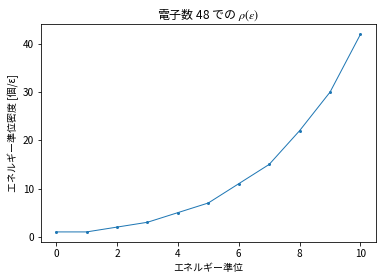

In [43]:
# scores, level_density = calc_level_density(states3)
scores, level_density = calc_level_density(states48)
plt.plot(scores, level_density, marker=".", linewidth=1, ms=4)
plt.xlabel("エネルギー準位")
plt.ylabel("エネルギー準位密度 [個/ε]")
plt.title(fr"電子数 {e_num} での $\rho(\epsilon)$")
plt.show()

### ↓ lim_sizeを設けていることは、当たり前だが、縮退度には影響しない

In [44]:
# scores_30jump, level_density_30jump = calc_level_density(states3_30jump)
# plt.plot(scores_30jump, level_density_30jump, marker=".", linewidth=0.8, ms=3, label="lim_size=30")
# plt.plot(scores, level_density, marker=".", linewidth=0.8, ms=3, label="lim_size=20")
# plt.legend()
# plt.xlabel("エネルギー準位")
# plt.ylabel("縮退度")
# plt.title(r"電子数 $3$ での $\rho(\epsilon)$")
# plt.show()

### 正規方程式を解き、最良近似の $\rho_0, \epsilon_0$ を求める

In [45]:
log_level_density = np.log(level_density)
a, b = solve_normal_equation(xs=scores, ys=log_level_density) # y = a + bx
rho_0 = np.exp(a)
eps_0 = 1/b
approx_level_density = calc_approx_level_density(states=states48, rho_0=rho_0, eps_0=eps_0)

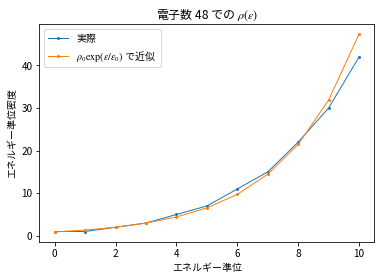

In [48]:
plt.plot(scores, level_density, marker=".", linewidth=1, ms=4, label="実際")
plt.plot(scores, approx_level_density, marker=".", linewidth=1, ms=4, label=r"$\rho_0\exp(\epsilon/\epsilon_0)$ で近似")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("エネルギー準位密度")
plt.title(fr"電子数 {e_num} での $\rho(\epsilon)$")
plt.show()

# eV-εの変換式を作る際にε_0を比較するが、ρ_0の値が全然違うけど大丈夫か？


In [47]:
rho_0, eps_0

(0.9077939941498221, 2.529075364232644)

In [ ]:
def foo(x):
    return 0.9 * np.exp(x/eps_0)

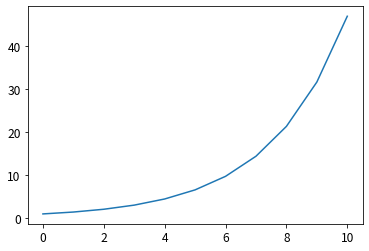

In [ ]:
xs = np.arange(0, 11, 1)
plt.plot(xs, foo(xs))
plt.show()

In [19]:
eV2eps = (2.53 / 122)

In [21]:
Te_lst_eV = np.array([100, 316, 1000, 3162, 10000])
ne_lst_eV = np.array([1e+15, 1e+17, 1e+19, 1e+20, 1e+22])
Te_lst_eps = Te_lst_eV * eV2eps
ne_lst_eps = ne_lst_eV * 1e-19 * eV2eps**3.5
Te_lst_eps, ne_lst_eps

(array([  2.07377049,   6.55311475,  20.73770492,  65.57262295,
        207.37704918]),
 array([1.28428798e-10, 1.28428798e-08, 1.28428798e-06, 1.28428798e-05,
        1.28428798e-03]))

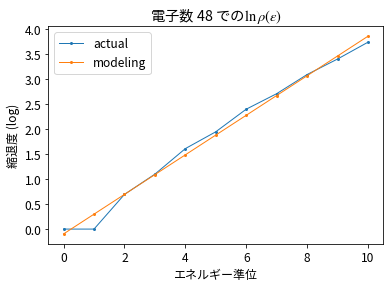

In [13]:
plt.plot(scores, log_level_density, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores, a + b * scores, marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度 (log)")
plt.title(f"電子数 {e_num} での" + r"$\ln{\rho(\epsilon)}$")
plt.show()

## 電子数10の時

7.222820372743798e-07 3.125124513518032


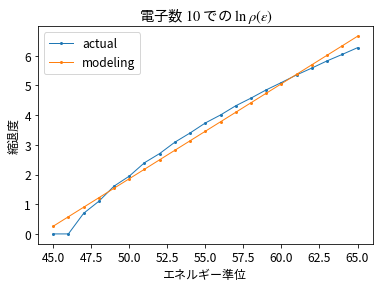

In [13]:
scores10, level_density10 = calc_level_density(states10)

# 正規方程式を解く
log_level_density10 = np.log(level_density10)
a10, b10 = solve_normal_equation(xs=scores10, ys=log_level_density10) # y = a10 + bx
rho_0 = np.exp(a10)
eps_0 = 1/b10
print(rho_0, eps_0)
approx_level_density = calc_approx_level_density(states=states10, rho_0=rho_0, eps_0=eps_0)

plt.plot(scores10, log_level_density10, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores10, a10 + b10 * scores10, marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $10$ での $\ln{\rho(\epsilon)}$")
plt.show()

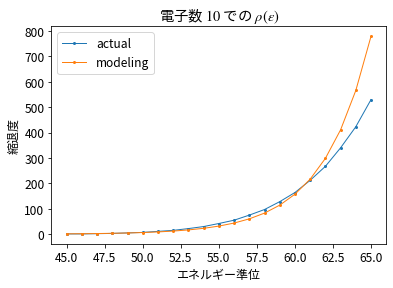

In [7]:
approx_level_density10 = calc_approx_level_density(states10, rho_0, eps_0)

plt.plot(scores10, level_density10, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores10, approx_level_density10, marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $10$ での $\rho(\epsilon)$")
plt.show()

Text(0.5, 1.0, '電子数 $10$ での $\\rho(\\epsilon)$')

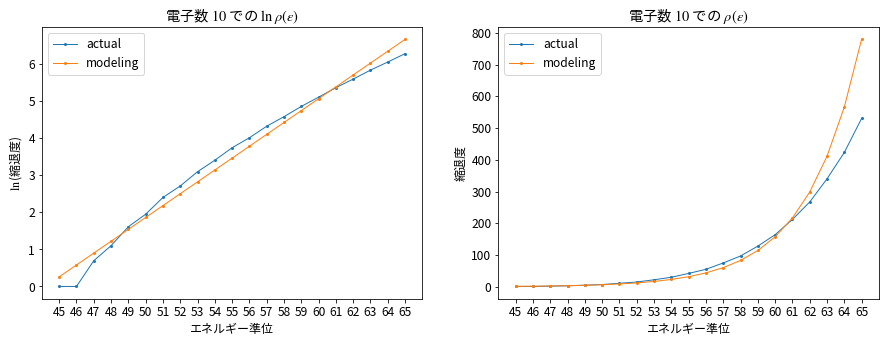

In [22]:
scores10, level_density10 = calc_level_density(states10)

# 正規方程式を解く
log_level_density10 = np.log(level_density10)
a10, b10 = solve_normal_equation(xs=scores10, ys=log_level_density10) # y = a10 + bx
rho_0 = np.exp(a10)
eps_0 = 1/b10

approx_level_density10 = calc_approx_level_density(states10, rho_0, eps_0)

fig = plt.figure(figsize=(15, 5))
# tick10 = [i for i in scores10 if i % 2 == 0]
tick10 = scores10

subfig1 = fig.add_subplot(1,2,1)
subfig1.plot(scores10, log_level_density10, marker=".", linewidth=1, ms=4, label="actual")
subfig1.plot(scores10, a10 + b10 * scores10, marker=".", linewidth=1, ms=4, label="modeling")
subfig1.legend()
subfig1.set_xlabel("エネルギー準位")
subfig1.set_ylabel(r"$\ln$(縮退度)")
subfig1.set_xticks(tick10)
subfig1.set_title(r"電子数 $10$ での $\ln{\rho(\epsilon)}$")

subfig2 = fig.add_subplot(1,2,2)
subfig2.plot(scores10, level_density10, marker=".", linewidth=1, ms=4, label="actual")
subfig2.plot(scores10, approx_level_density10, marker=".", linewidth=1, ms=4, label="modeling")
subfig2.legend()
subfig2.set_xlabel("エネルギー準位")
subfig2.set_ylabel("縮退度")
subfig2.set_xticks(tick10)
subfig2.set_title(r"電子数 $10$ での $\rho(\epsilon)$")


## 電子数20の時

Text(0.5, 1.0, '電子数 $20$ での $\\rho(\\epsilon)$')

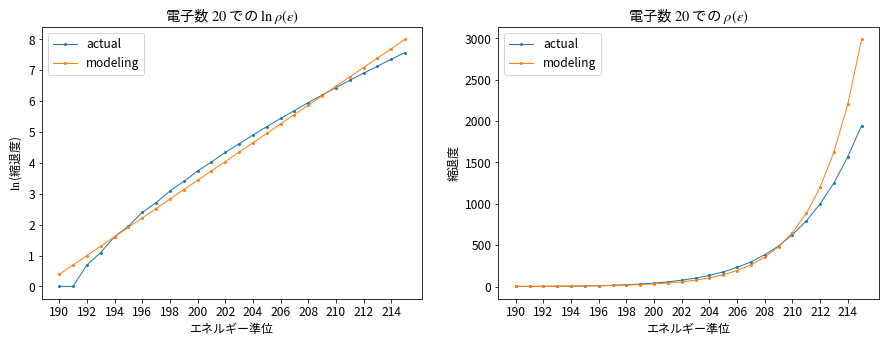

In [19]:
scores20, level_density20 = calc_level_density(states20)

# 正規方程式を解く
log_level_density20 = np.log(level_density20)
a20, b20 = solve_normal_equation(xs=scores20, ys=log_level_density20) # y = a20 + bx
rho_0 = np.exp(a20)
eps_0 = 1/b20

approx_level_density20 = calc_approx_level_density(states20, rho_0, eps_0)

fig= plt.figure(figsize=(15, 5))
tick = [i for i in scores20 if i % 2 == 0]

subfig1 = fig.add_subplot(1,2,1)
subfig1.plot(scores20, log_level_density20, marker=".", linewidth=1, ms=4, label="actual")
subfig1.plot(scores20, a20 + b20 * scores20, marker=".", linewidth=1, ms=4, label="modeling")
subfig1.legend()
subfig1.set_xlabel("エネルギー準位")
subfig1.set_ylabel(r"$\ln$(縮退度)")
subfig1.set_xticks(tick)
subfig1.set_title(r"電子数 $20$ での $\ln{\rho(\epsilon)}$")

subfig2 = fig.add_subplot(1,2,2)
subfig2.plot(scores20, level_density20, marker=".", linewidth=1, ms=4, label="actual")
subfig2.plot(scores20, approx_level_density20, marker=".", linewidth=1, ms=4, label="modeling")
subfig2.legend()
subfig2.set_xlabel("エネルギー準位")
subfig2.set_ylabel("縮退度")
subfig2.set_xticks(tick)
subfig2.set_title(r"電子数 $20$ での $\rho(\epsilon)$")

In [17]:
scores20

array([190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215])

1.117942487483077e-25 3.284685558827168


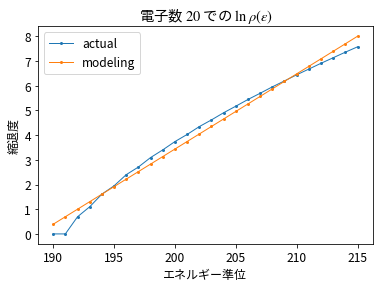

In [14]:
scores20, level_density20 = calc_level_density(states20)

# 正規方程式を解く
log_level_density20 = np.log(level_density20)
a20, b20 = solve_normal_equation(xs=scores20, ys=log_level_density20) # y = a20 + bx
rho_0 = np.exp(a20)
eps_0 = 1/b20
print(rho_0, eps_0)

plt.plot(scores20, log_level_density20, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores20, a20 + b20 * scores20, marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $20$ での $\ln{\rho(\epsilon)}$")
plt.show()

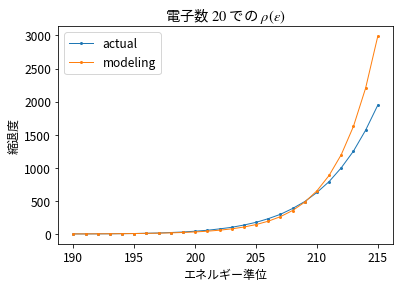

In [15]:
approx_level_density20 = calc_approx_level_density(states20, rho_0, eps_0)

plt.plot(scores20, level_density20, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores20, approx_level_density20, marker=".", linewidth=1, ms=4, label="modeling")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $20$ での $\rho(\epsilon)$")
plt.show()

## 結果
* n が小さすぎると、$\rho(\epsilon)\approx\rho_0\exp{\dfrac{\epsilon}{\epsilon_0}}$ という近似した方程式が成立しない（実際の値の対数をとりプロットしたものが直線にならない）
* n が 10 や 20 になると近似は成立する(?)
* 上準位に行くほど縮退度の近似値の誤差が大きくなる
    * 電子数 n が大きいほど縮退度は大きくなる(とり得る総エネルギーの数(= lim_size )を等しくとった場合でも)
    * lim_sizeを設けていることが誤差を生んでいる原因ではない。(縮退度は変わらない)
    * <span style="color: aquamarine">TODO: 単純に $\rho(\epsilon)\approx\rho_0\exp{\dfrac{\epsilon}{\epsilon_0}}$ という縮退度をモデリングした式が良くない？より良いモデルを考える</span>
    * <span style="color: aquamarine">TODO: もしくは正規方程式でのフィッティングが良くない。縮退度の式はあくまで近似式なので、誤差が出るのは仕方ない。</br>
    ただ対数をとっているので、エネルギー準位が大きいときの誤差と小さいときでの誤差が等しく扱われると、対数を基に戻したときに、エネルギー準位が大きいときでの誤差が異常に大きくなるように見えてしまう。</br>
    フィッティング方法を変える必要があるかも。
    </span>
    * ~~実際の縮退度の対数をとったものを線形フィッティングする際に、$\ln{E_0}, \ln{E_1}$ の値が必ず0になるので、$ln{E_0}$ を無視してフィッティングを行う~~
        * これはほとんど意味がなかった
* <span style="color: pink">忘れてはいけないのは、この $\rho_0, \epsilon_0$ の決め方は、あくまでも実験のため。これらの定数の値を決めるために、縮退度の情報を使用しちゃっているから。(じゃあ近似せんでいいやんってなるし。)</span>
  * <span style="color: pink">ただ $\epsilon_0, \rho_0$ の値は 電子数 n に依存してることは間違いなさそうなので、様々な電子数のデータをとり、$\epsilon_0(n) = ???, \rho_0(n) = ???$ の式を作りたい</span>


## とりあえず電子数3でやっていく

In [26]:
from typing import Callable

def simpson(x_0: float, x_N: float, func: Callable, N: int=100000):
    """シンプソン法による積分計算"""
    h = (x_N - x_0) / N
    S = 0
    for i in range(N//2):
        S += h/3 * (func(x_0 + 2 * i * h) + 4*func(x_0 + (2*i + 1)*h) + func(x_0 + (2*i + 2)*h))
    return S

def approx_degeneracy_func(score: float, rho_0: float, eps_0: float):
    """縮退度の近似式"""
    return rho_0 * np.exp(score / eps_0)

# 縮退度で平均するときに必要になる
def calc_approx_level_density(states: list[State], rho_0: float, eps_0: float) -> NDArray[np.float64]:
    """近似した縮退度を計算"""
    # 昇順にソート
    scores = np.sort(np.array(list({state.score for state in states})))
    # return rho_0 * np.exp(scores/eps_0)
    return approx_degeneracy_func(scores, rho_0, eps_0)

In [46]:
ne = 0.0001
Te = 0.5
scores, level_density = calc_level_density(states3)

In [47]:
log_level_density = np.log(level_density)
a, b = solve_normal_equation(xs=scores, ys=log_level_density) # y = a + bx
rho_0 = np.exp(a)
eps_0 = 1/b
approx_level_density = calc_approx_level_density(states=states3, rho_0=rho_0, eps_0=eps_0)

In [27]:
def calc_approx_distribution(scores, rho_0, eps_0):
    """
    構築した理論モデルで占有密度を計算
    """
    ns = []
    score_0 = scores[0]
    for score in scores[1:]:
        n = ne * np.exp(-(score - score_0)/Te)
        n /= simpson(score_0, score, lambda x: approx_degeneracy_func(x, rho_0, eps_0))
        ns.append(n)
    ns.insert(0, 1 - sum(ns))
    return ns

In [17]:
# 数値計算結果
fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
scores_fermi, mean_distribution = fermi.calc_mean_distribution()

In [49]:
approx_distribution = calc_approx_distribution(scores, rho_0, eps_0)

In [50]:
approx_mean_distribution = approx_distribution / approx_level_density

### 近似した平均占有密度分布 (縮退度で平均)

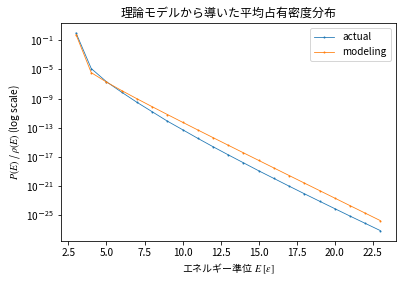

In [51]:
plt.plot(scores_fermi, mean_distribution, marker='.', linewidth=0.8, ms=2, label='actual')
plt.plot(scores, approx_mean_distribution, marker='.', linewidth=0.8, ms=2, label='modeling')
plt.title("理論モデルから導いた平均占有密度分布")
plt.legend()
plt.yscale("log")
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$")
plt.ylabel(r"$P(E)$ / $\rho(E)$ (log scale)")
plt.show()

### 縮退度で平均していない、占有密度分布

In [ ]:
scores_fermi, distribution = fermi.calc_distribution()

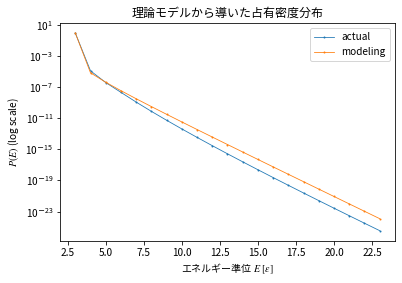

In [20]:
plt.plot(scores_fermi, distribution, marker='.', linewidth=0.8, ms=2, label='actual')
plt.plot(scores, approx_distribution, marker='.', linewidth=0.8, ms=2, label='modeling')
plt.title("理論モデルから導いた占有密度分布")
plt.legend()
plt.yscale("log")
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$")
plt.ylabel(r"$P(E)$ (log scale)")
plt.show()

### 縮退度の式を差し替え
<span style="font-size: 110%;">

$\rho(\epsilon)=\frac{1}{\sqrt{48}}\frac{1}{\epsilon-\epsilon_0}\exp{[2 \{\frac{\pi^2}{6}(\epsilon-\epsilon_0)\}^{1/2} ]}$
</span><br>

* ※本来この近似は基底状態よりもエネルギー準位がかなり大きいときにしか成り立たない
* **この式のlogをとると、y = x^(1/2) の形になる。実際の縮退度もlogとると、上向きに緩やかにカーブしているからこの近似式のほうがあってそう。**
* ただ定数部分がおかしい。この式を導出するときにいくつか近似を用いているので、ちゃんと教科書を読んで、その近似の妥当性について調べる。
  * 定数部分がおかしい点は見つからへんかった。怪しいとすれば、$g_f$ を１と置いているのが微妙なくらい
* とりあえず log とってからそれを２乗すると最小２乗法で線形近似できて、最適な定数が得られるので、それを試してみる？
  * この縮退度に関しては、１粒子遷移しか考えていないとか、衝突励起レートの式を簡易に書いているとかは関係なく、本来は定数も式のようになるはず。
  * だから仮にフィッティングして定数が得られたとしても、その値にあまり意味はない
  * $\rho(\epsilon) \approx a\frac{1}{\epsilon-\epsilon_0}\exp{[b( \epsilon-\epsilon_0)^{1/2} ]}$ みたいな感じにおいて、定数a,bを決める感じ

In [34]:
from typing import Callable

def simpson(x_0: float, x_N: float, func: Callable, N: int=100000):
    """シンプソン法による積分計算"""
    h = (x_N - x_0) / N
    S = 0
    for i in range(N//2):
        if i == 0: # func(x_0 + 2 * i * h) == func(scores[0])となり、この値の計算ではzeroDivisionとなってしまう
            S += h/3 * (1 + 4*func(x_0 + (2*i + 1)*h) + func(x_0 + (2*i + 2)*h))
        else:
            S += h/3 * (func(x_0 + 2 * i * h) + 4*func(x_0 + (2*i + 1)*h) + func(x_0 + (2*i + 2)*h))
    return S

def approx_new_degeneracy_func(score: int, score_0: int):
    """縮退度の新しい近似式"""
    E = score - score_0
    # return 0.8 * np.exp(2 * np.sqrt(np.pi**2 * E * 0.6 / 6)) / np.sqrt(48) / E # テキトーに定数倍したもの
    return np.exp(2 * np.sqrt(np.pi**2 * E / 6)) / np.sqrt(48) / E

# 縮退度で平均するときに使用する
def calc_approx_new_level_density(states: list[State]) -> NDArray[np.float64]:
    """新しい近似式で近似した縮退度を計算"""
    # 昇順にソート
    scores = np.sort(np.array(list({state.score for state in states})))
    return approx_new_degeneracy_func(scores, scores[0])

def calc_approx_new_distribution(scores):
    """
    構築した理論モデルで占有密度を計算
    """
    ns = []
    score_0 = scores[0]
    for score in scores[1:]:
        n = ne * np.exp(-(score - score_0)/Te)
        n /= simpson(score_0, score, lambda x: approx_new_degeneracy_func(x, score_0))
        ns.append(n)
    ns.insert(0, 1 - sum(ns))
    return ns

In [17]:
ne = 0.0001
Te = 0.5
scores, level_density = calc_level_density(states10)

# 数値計算結果
fermi = Fermi(states10, equ=False, Te=Te, ne=ne, threshold=1e-10)
scores_fermi, mean_distribution = fermi.calc_mean_distribution()

In [18]:
# 数値計算結果
fermi_ = Fermi(states10, equ=False, Te=Te, ne=ne, threshold=1e-15)
scores_fermi_, mean_distribution_ = fermi_.calc_mean_distribution()

In [24]:
# 数値計算結果
fermi_1e9 = Fermi(states10, equ=False, Te=Te, ne=ne, threshold=1e-9)
scores_fermi_1e9, mean_distribution_1e9 = fermi_1e9.calc_mean_distribution()

In [22]:
# 数値計算結果
fermi_1e8 = Fermi(states10, equ=False, Te=Te, ne=ne, threshold=1e-8)
scores_fermi_1e8, mean_distribution_1e8 = fermi_1e8.calc_mean_distribution()

In [28]:
approx_new_level_density = [1]
for score in scores:
    if score != scores[0]:
        approx_new_level_density.append(approx_new_degeneracy_func(score, scores[0]))

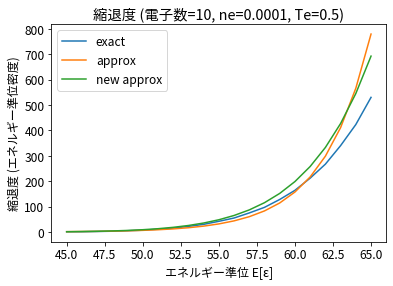

In [16]:
plt.plot(scores, level_density, label="exact")
plt.plot(scores, approx_level_density, label="approx")
plt.plot(scores, approx_new_level_density, label="new approx")
plt.title(f"縮退度 (電子数=10, ne={ne}, Te={Te})")
plt.xlabel("エネルギー準位 E[ε]")
plt.ylabel("縮退度 (エネルギー準位密度)")
plt.legend()
plt.show()

#### 閾値をどこまで下げてもいいのか

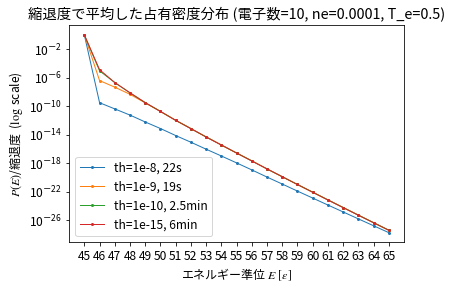

In [25]:
plt.plot(scores_fermi_1e8, mean_distribution_1e8, label="th=1e-8, 22s", marker=".", linewidth=1, ms=4)
plt.plot(scores_fermi_1e9, mean_distribution_1e9, label="th=1e-9, 19s", marker=".", linewidth=1, ms=4)
plt.plot(scores_fermi, mean_distribution, label="th=1e-10, 2.5min", marker=".", linewidth=1, ms=4)
plt.plot(scores_fermi_, mean_distribution_, label="th=1e-15, 6min", marker=".", linewidth=1, ms=4)
plt.legend(loc="lower left")
plt.xticks(scores_fermi)
plt.title(f"縮退度で平均した占有密度分布 (電子数=10, ne={ne}, T_e={Te})")
plt.yscale("log")
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$")
plt.ylabel(r"$P(E)$/縮退度  ($\log$ scale)")
plt.show()

#### 結果
* 電子数が10のときは、閾値は **1e-10** まで下げても大丈夫そう

In [37]:
approx_new_distribution = calc_approx_new_distribution(scores)

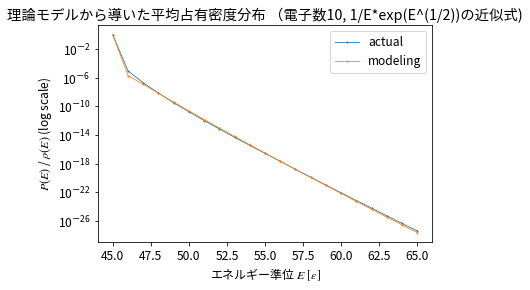

In [40]:
approx_new_mean_distribution = np.array(approx_new_distribution) / np.array(approx_new_level_density)
plt.plot(scores_fermi, mean_distribution, marker='.', linewidth=0.8, ms=2, label='actual')
plt.plot(scores, approx_new_mean_distribution, marker='.', linewidth=0.8, ms=2, label='modeling')
plt.title("理論モデルから導いた平均占有密度分布 （電子数10, 1/E*exp(E^(1/2))の近似式)")
plt.legend()
plt.yscale("log")
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$")
plt.ylabel(r"$P(E)$ / $\rho(E)$ (log scale)")
plt.show()

## $\rho_0, \epsilon_0$ を決定するフィッティングで $\ln{E_0}$ を無視してフィッティングする

In [43]:
log_level_density2 = np.log(level_density[1:])
a2, b2 = solve_normal_equation(xs=scores[1:], ys=log_level_density2) # y = a2 + bx
rho_02 = np.exp(a2)
eps_02 = 1/b2
approx_level_density2 = calc_approx_level_density(states=states3, rho_0=rho_02, eps_0=eps_02)

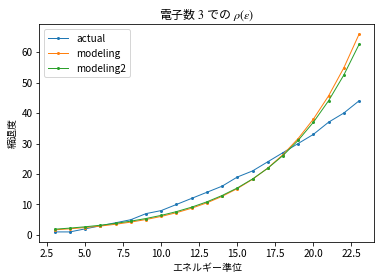

In [47]:
plt.plot(scores, level_density, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores, approx_level_density, marker=".", linewidth=1, ms=4, label="modeling")
plt.plot(scores, approx_level_density2, marker=".", linewidth=1, ms=4, label="modeling2")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $3$ での $\rho(\epsilon)$")
plt.show()

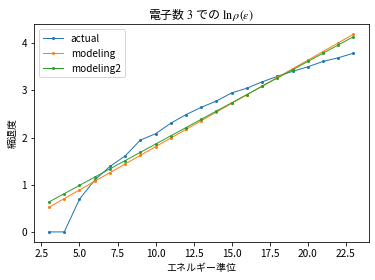

In [48]:
plt.plot(scores, log_level_density, marker=".", linewidth=1, ms=4, label="actual")
plt.plot(scores, a + b * scores, marker=".", linewidth=1, ms=4, label="modeling")
plt.plot(scores, a2 + b2 * scores, marker=".", linewidth=1, ms=4, label="modeling2")
plt.legend()
plt.xlabel("エネルギー準位")
plt.ylabel("縮退度")
plt.title(r"電子数 $3$ での $\ln{\rho(\epsilon)}$")
plt.show()

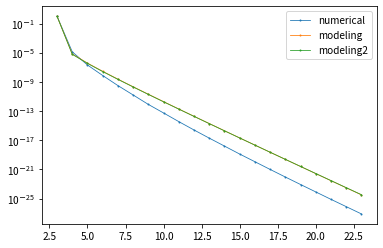

In [49]:
approx_distribution2 = calc_approx_distribution(scores, rho_02, eps_02)
plt.plot(scores_fermi, distribution, marker='.', linewidth=0.8, ms=2, label='numerical')
plt.plot(scores, approx_distribution, marker='.', linewidth=0.8, ms=2, label='modeling')
plt.plot(scores, approx_distribution2, marker='.', linewidth=0.8, ms=2, label='modeling2')
plt.legend()
plt.yscale("log")
# plt.xlim(2.5, 3.5)
# plt.ylim(0.001, 1.5)
plt.show()

### 結果
* まあわかってたけど、$\ln{E_0}$ を無視したところでほとんど変わらない

### **以下はAやCの式が間違っていたため無視する**

In [47]:
emission = A * population

In [49]:
emission_max = np.max(emission)

In [50]:
np.where(emission == emission_max)

(array([0], dtype=int64), array([1], dtype=int64))

In [52]:
emission, emission_max

(array([[0.00000000e+00, 1.31689631e-05, 1.64813629e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.06017037e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 1.3168963080546529e-05)

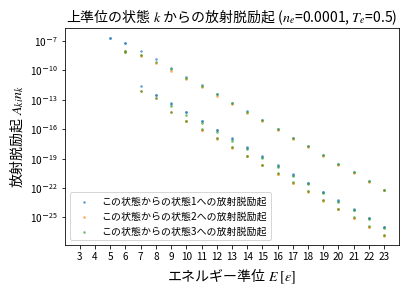

In [95]:
for i in range(1, 4):
    plt.scatter(scores, emission[i], alpha=0.5, s=3, label=f"この状態からの状態{i}への放射脱励起")
plt.legend(loc="lower left")
plt.title(fr"上準位の状態 $k$ からの放射脱励起 ($n_e$={ne}, $T_e$={Te})", fontsize=14)
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$", fontsize=14)
plt.ylabel(r"放射脱励起 $A_{ki}n_k$", fontsize=14)
plt.xticks(sorted(list(set(scores))))
plt.yscale("log")

### → 放射脱励起 $A_{ki}n_k$ の最大値は、もちろんやけど、準位 1 →準位 0  への脱励起で、1.31689631e-05
* 基底状態の占有密度は (1 - (その他の和)) という形で出すから、準位 0(基底状態)への脱励起は考えることはないけど、準位 2 -> 1 では2.06017037e-07
* これと比べて、基底状態からの衝突励起による influx のオーダーは？
  * 基底状態からの衝突励起による influx の最大値は、1.7822253484382603e-10 
→ influx に関しては、基底状態からの衝突励起を考えるだけではダメ

In [53]:
C = fermi.excitation

In [62]:
excitation_from_ground = (C * population)[0]
efg_max, efg_min = np.max(excitation_from_ground), np.min(excitation_from_ground)

In [63]:
efg_max, efg_min

(1.7822253484382603e-10, 0.0)

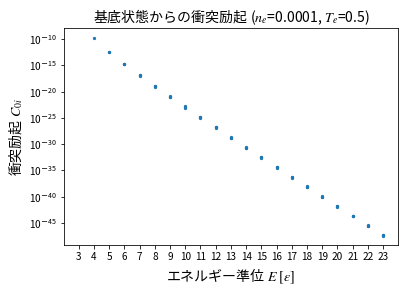

In [94]:
C = fermi.excitation
excitation_from_ground = (C * population)[0]

plt.scatter(scores, excitation_from_ground, s=5)
plt.title(fr"基底状態からの衝突励起 ($n_e$={ne}, $T_e$={Te})", fontsize=14)
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$", fontsize=14)
plt.ylabel(r"衝突励起 $C_{0i}$", fontsize=14)
plt.xticks(sorted(list(set(scores))))
plt.yscale("log")

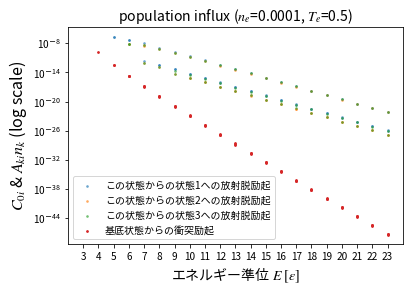

In [100]:
for i in range(1, 4):
    plt.scatter(scores, emission[i], alpha=0.5, s=3, label=f"この状態からの状態{i}への放射脱励起")
plt.scatter(scores, excitation_from_ground, s=3, label="基底状態からの衝突励起")
plt.xlabel(r"エネルギー準位 $E$ $[\epsilon]$", fontsize=14)
plt.ylabel(r"$C_{0i}$ & $A_{ki}n_k$ (log scale)", fontsize=16)
plt.legend(loc="lower left")
plt.title(fr"population influx ($n_e$={ne}, $T_e$={Te})", fontsize=14)
plt.xticks(sorted(list(set(scores))))
plt.yscale("log")

In [118]:
def foo(*fluxes):
    print(fluxes)
    print(*fluxes)

In [119]:
foo([1,2,3], [4,5,6])

([1, 2, 3], [4, 5, 6])
[1, 2, 3] [4, 5, 6]
